In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv("diabetes.csv")
data.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,No,0,0,1,0,...,1,0,3,5,30,0,Male,4,6,8
1,0,1,1,1,26,Yes,1,0,0,1,...,1,0,3,0,0,0,Male,12,6,8
2,0,0,0,1,26,No,0,0,1,1,...,1,0,1,0,10,0,Male,13,6,8
3,0,1,1,1,28,Yes,0,0,1,1,...,1,0,3,0,3,0,Male,11,6,8
4,0,0,0,1,29,Yes,0,0,1,1,...,1,0,2,0,0,0,Male,8,5,8


In [3]:
# Check missing values

print(data.isnull().sum())
print("Total Missing Values: ", data.isnull().sum().sum())

if data.isnull().sum().sum() == 0:
    print("No missing values")
else:
    print("Missing values found")

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Total Missing Values:  0
No missing values


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Diabetes_binary       70692 non-null  int64 
 1   HighBP                70692 non-null  int64 
 2   HighChol              70692 non-null  int64 
 3   CholCheck             70692 non-null  int64 
 4   BMI                   70692 non-null  int64 
 5   Smoker                70692 non-null  object
 6   Stroke                70692 non-null  int64 
 7   HeartDiseaseorAttack  70692 non-null  int64 
 8   PhysActivity          70692 non-null  int64 
 9   Fruits                70692 non-null  int64 
 10  Veggies               70692 non-null  int64 
 11  HvyAlcoholConsump     70692 non-null  int64 
 12  AnyHealthcare         70692 non-null  int64 
 13  NoDocbcCost           70692 non-null  int64 
 14  GenHlth               70692 non-null  int64 
 15  MentHlth              70692 non-null

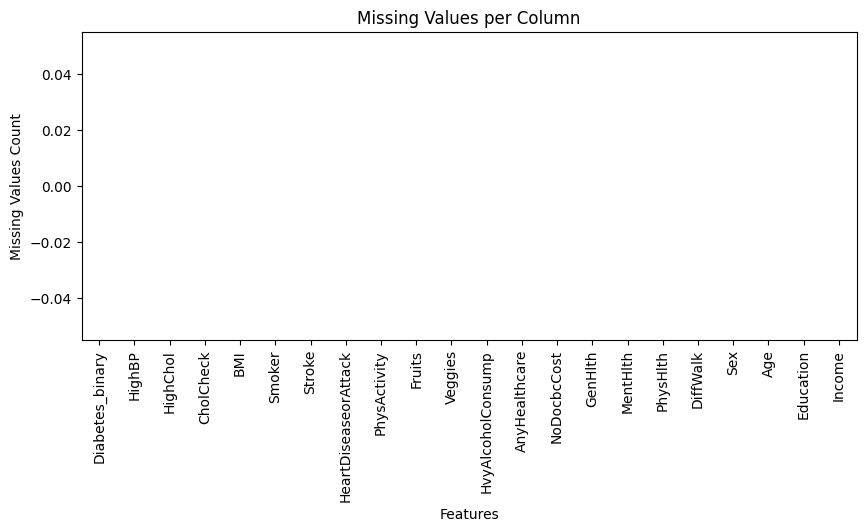

In [5]:
# Plot missing values count
plt.figure(figsize=(10, 4))
sns.barplot(x=data.isnull().sum().index, y=data.isnull().sum().values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Missing Values Count")
plt.title("Missing Values per Column")
plt.show()

In [63]:
# IT24102226 

# checking duplicate rows
print("duplicate rows: ", data.duplicated().sum())

duplicate rows:  1634


In [64]:
# Show first 5 duplicate rows
print(data[data.duplicated()].head())

      Diabetes_binary  HighBP  HighChol  CholCheck  BMI Smoker  Stroke  \
602                 0       0         0          1   22     No       0   
689                 0       0         0          1   26     No       0   
891                 0       0         0          1   24     No       0   
1092                0       0         0          1   21     No       0   
1326                0       1         0          1   29     No       0   

      HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
602                      0             1       1  ...              1   
689                      0             1       1  ...              1   
891                      0             1       1  ...              1   
1092                     0             1       1  ...              1   
1326                     0             1       0  ...              1   

      NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk     Sex  Age  \
602             0        1         0         0   

In [65]:
#Remove duplicates
data_dup_cleaned = data.drop_duplicates()

print("\nShape before cleaning:", data.shape)
print("Shape after removing duplicates:", data_dup_cleaned.shape)


Shape before cleaning: (70692, 22)
Shape after removing duplicates: (69058, 22)


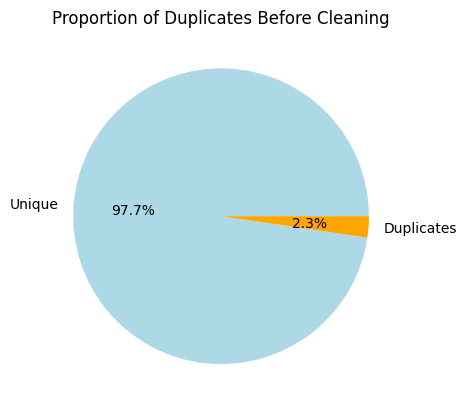

In [66]:
# Pie Chart of Unique vs Duplicate

dup = data.duplicated().sum()
unique = len(data) - dup

plt.pie([unique, dup],
        labels=['Unique','Duplicates'],
        autopct='%1.1f%%',
        colors=['lightblue','orange'])
plt.title("Proportion of Duplicates Before Cleaning")
plt.show()


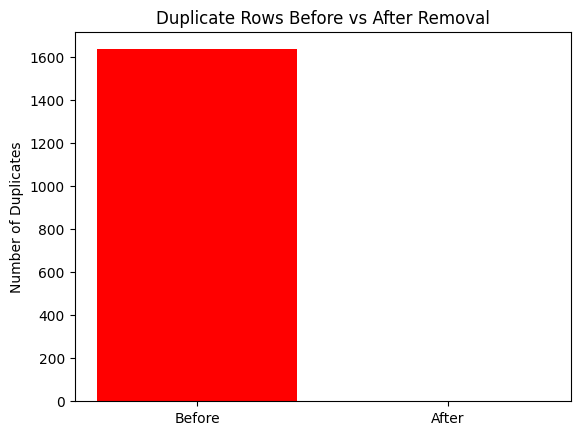

In [67]:
# Bar Plot of Duplicate Counts

duplicates_count = [data.duplicated().sum(), data_dup_cleaned.duplicated().sum()]

plt.bar(['Before', 'After'], duplicates_count, color=['red','green'])
plt.ylabel('Number of Duplicates')
plt.title('Duplicate Rows Before vs After Removal')
plt.show()

In [68]:
# IT24102244

# Convert categorical data in to numerical data
from sklearn.preprocessing import LabelEncoder

In [70]:
#Checking categorical columns
categorical_cols = data_dup_cleaned.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['Smoker', 'Sex'], dtype='object')


In [71]:
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(data_dup_cleaned[col].value_counts())


Column: Smoker
Smoker
No     35776
Yes    33282
Name: count, dtype: int64

Column: Sex
Sex
Female    37534
Male      31524
Name: count, dtype: int64


In [72]:

target = "Diabetes_binary"

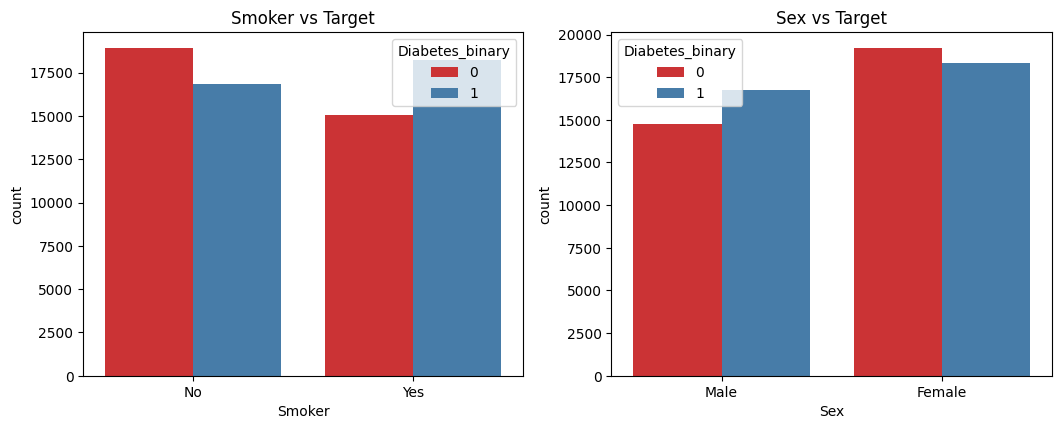

In [73]:
#  Categorical variables vs Target (Countplots)

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue=target, data=data_dup_cleaned, palette="Set1")
    plt.title(f"{col} vs Target")
plt.tight_layout()
plt.show()

In [74]:
data_dup_cleaned.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,No,0,0,1,0,...,1,0,3,5,30,0,Male,4,6,8
1,0,1,1,1,26,Yes,1,0,0,1,...,1,0,3,0,0,0,Male,12,6,8
2,0,0,0,1,26,No,0,0,1,1,...,1,0,1,0,10,0,Male,13,6,8
3,0,1,1,1,28,Yes,0,0,1,1,...,1,0,3,0,3,0,Male,11,6,8
4,0,0,0,1,29,Yes,0,0,1,1,...,1,0,2,0,0,0,Male,8,5,8


In [75]:
label_encoder = LabelEncoder()

In [76]:
# Make a copy to preserve original values
data_before_encode = data_dup_cleaned.copy()


In [77]:
encoded_data = data_dup_cleaned.copy()  # work on a separate copy

# Loop through each categorical column
for col in categorical_cols:
    encoded_data[col] = label_encoder.fit_transform(encoded_data[col])

# Check result
encoded_data.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,1,8,5,8


In [78]:
# Before encoding
for col in categorical_cols:
    print(f"\nColumn: {col} (before encoding)")
    print(data_before_encode[col].value_counts())

# After encoding
for col in categorical_cols:
    print(f"\nColumn: {col} (after encoding)")
    print(encoded_data[col].value_counts())



Column: Smoker (before encoding)
Smoker
No     35776
Yes    33282
Name: count, dtype: int64

Column: Sex (before encoding)
Sex
Female    37534
Male      31524
Name: count, dtype: int64

Column: Smoker (after encoding)
Smoker
0    35776
1    33282
Name: count, dtype: int64

Column: Sex (after encoding)
Sex
0    37534
1    31524
Name: count, dtype: int64


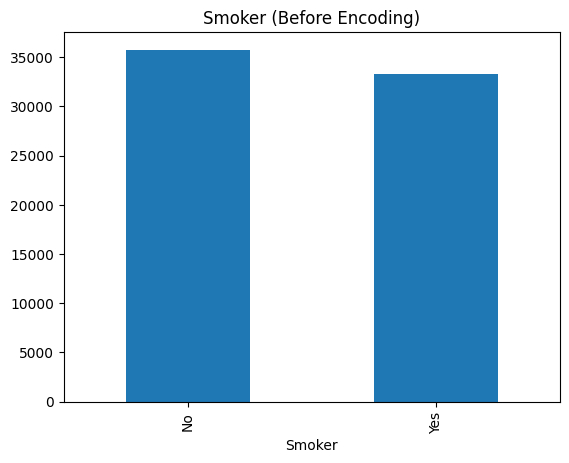

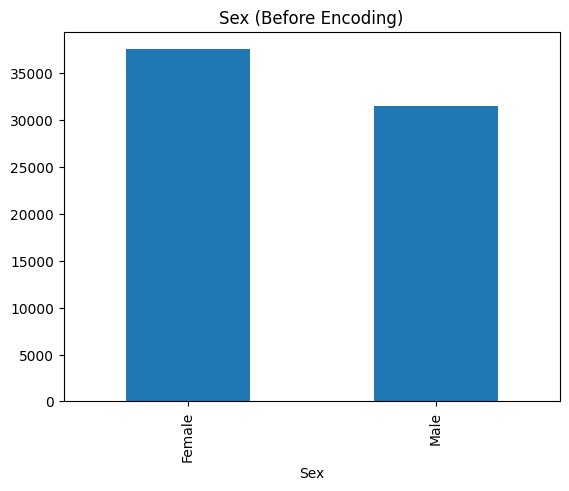

In [79]:
import matplotlib.pyplot as plt

for col in categorical_cols:
    data_before_encode[col].value_counts().plot(kind='bar', title=f"{col} (Before Encoding)")
    plt.show()


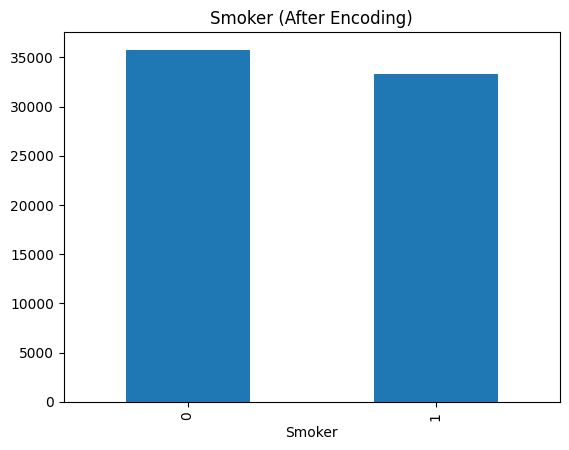

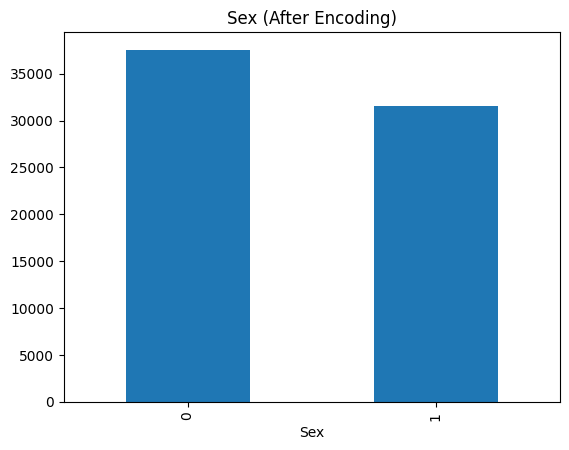

In [80]:
for col in categorical_cols:
    encoded_data[col].value_counts().plot(kind='bar', title=f"{col} (After Encoding)")
    plt.show()

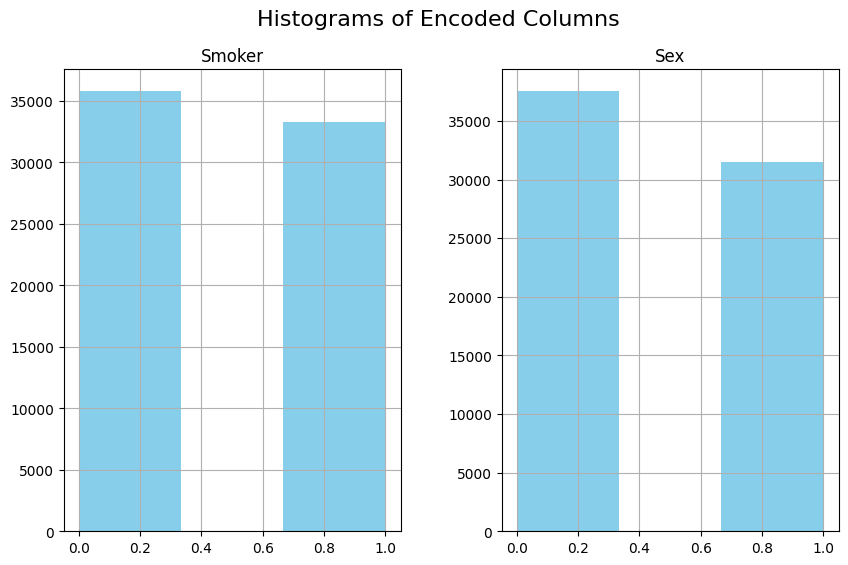

In [81]:
import matplotlib.pyplot as plt
# Histograms
encoded_data[categorical_cols].hist(figsize=(10,6), bins=3, color='skyblue')
plt.suptitle("Histograms of Encoded Columns", fontsize=16)
plt.show()


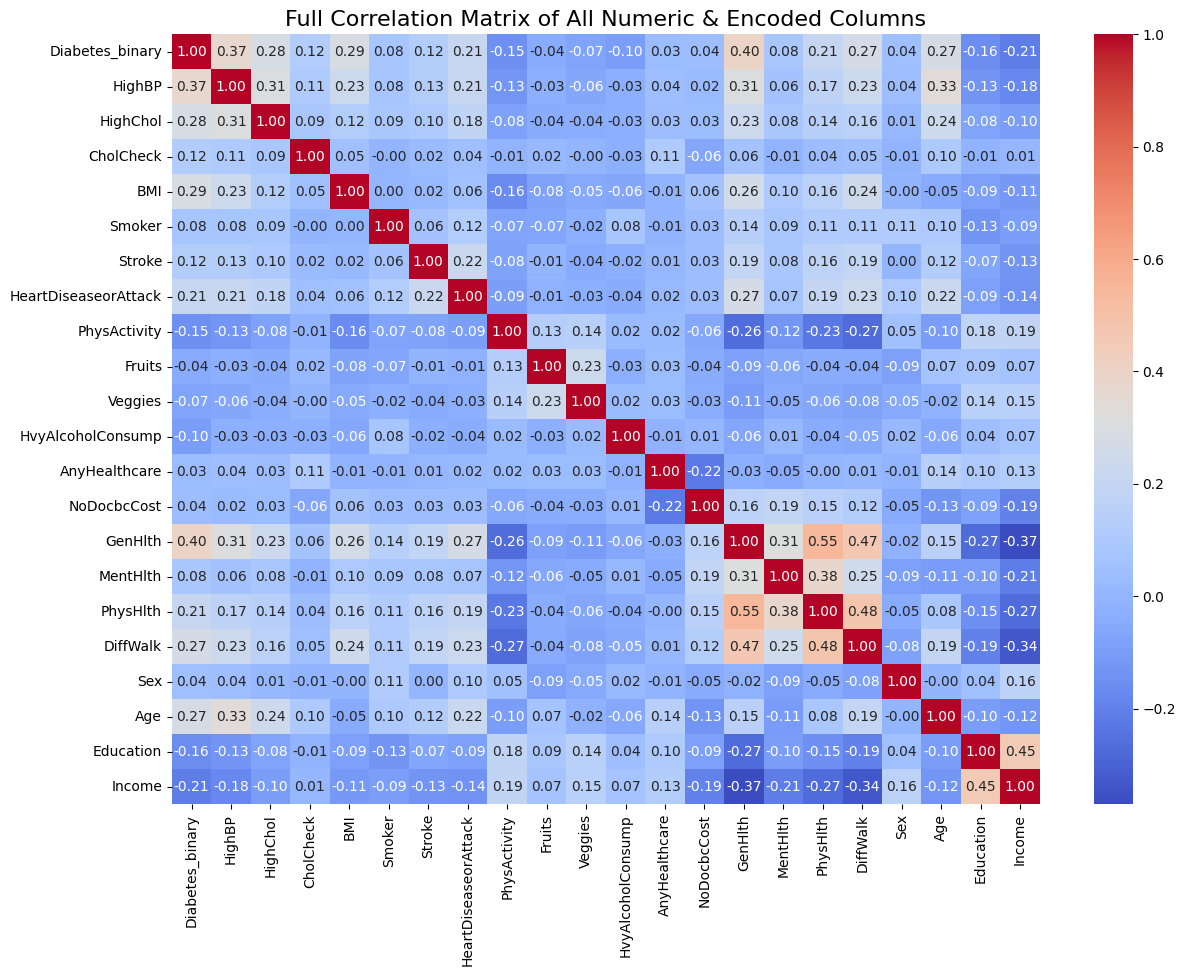

In [82]:
# Select all numeric columns (including encoded categorical columns)
numeric_cols = encoded_data.select_dtypes(include=['int64', 'float64']).columns

# Plot full correlation matrix
plt.figure(figsize=(14,10))
sns.heatmap(encoded_data[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Full Correlation Matrix of All Numeric & Encoded Columns", fontsize=16)
plt.show()


In [83]:
# Scaling Data (IT24102189)

import pandas as pd
from sklearn.preprocessing import StandardScaler

In [84]:
print("Dataset Loaded")
print("Shape:", encoded_data.shape)
print("Columns:", encoded_data.columns.tolist())
print(encoded_data.head())

Dataset Loaded
Shape: (69058, 22)
Columns: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
   Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                0       1         0          1   26       0       0   
1                0       1         1          1   26       1       1   
2                0       0         0          1   26       0       0   
3                0       1         1          1   28       1       0   
4                0       0         0          1   29       1       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             1       0  ...              1   
1                     0             0       1  ...              1   
2                     0             1

In [85]:
X = encoded_data.drop('Diabetes_binary', axis=1)
y = encoded_data['Diabetes_binary']

In [86]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [87]:
scaler = StandardScaler()

In [88]:
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [89]:
scaled_data = pd.concat([y, X_scaled], axis=1)

In [90]:
scaled_data.to_csv('Scaling.csv', index=False)

In [91]:
print(X_scaled[numeric_cols].mean())
print(X_scaled[numeric_cols].std())

HighBP                 -1.053601e-16
HighChol                0.000000e+00
CholCheck              -5.268005e-17
BMI                     1.580401e-16
Smoker                  1.514551e-16
Stroke                 -2.634002e-17
HeartDiseaseorAttack   -2.634002e-17
PhysActivity           -1.185301e-16
Fruits                  3.292503e-17
Veggies                -5.268005e-17
HvyAlcoholConsump      -5.926505e-17
AnyHealthcare          -5.268005e-17
NoDocbcCost            -1.317001e-17
GenHlth                 5.268005e-17
MentHlth               -1.975502e-17
PhysHlth                2.634002e-17
DiffWalk                0.000000e+00
Sex                     3.292503e-17
Age                     0.000000e+00
Education              -6.585006e-17
Income                  0.000000e+00
dtype: float64
HighBP                  1.000007
HighChol                1.000007
CholCheck               1.000007
BMI                     1.000007
Smoker                  1.000007
Stroke                  1.000007
HeartDisea

In [92]:
scaled_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0.866402,-1.064734,0.160771,-0.553426,-0.964515,-0.260706,-0.421522,0.660134,-1.239320,...,0.219815,-0.326132,0.123039,0.140924,2.372502,-0.590606,1.091168,-1.610790,1.068385,1.079537
1,0,0.866402,0.939202,0.160771,-0.553426,1.036791,3.835734,-0.421522,-1.514844,0.806894,...,0.219815,-0.326132,0.123039,-0.466531,-0.586372,-0.590606,1.091168,1.188132,1.068385,1.079537
2,0,-1.154198,-1.064734,0.160771,-0.553426,-0.964515,-0.260706,-0.421522,0.660134,0.806894,...,0.219815,-0.326132,-1.682114,-0.466531,0.399919,-0.590606,1.091168,1.537998,1.068385,1.079537
3,0,0.866402,0.939202,0.160771,-0.273623,1.036791,-0.260706,-0.421522,0.660134,0.806894,...,0.219815,-0.326132,0.123039,-0.466531,-0.290485,-0.590606,1.091168,0.838267,1.068385,1.079537
4,0,-1.154198,-1.064734,0.160771,-0.133721,1.036791,-0.260706,-0.421522,0.660134,0.806894,...,0.219815,-0.326132,-0.779537,-0.466531,-0.586372,-0.590606,1.091168,-0.211329,0.096873,1.079537


In [93]:
# Data vizualisation

import matplotlib.pyplot as plt
import seaborn as sns

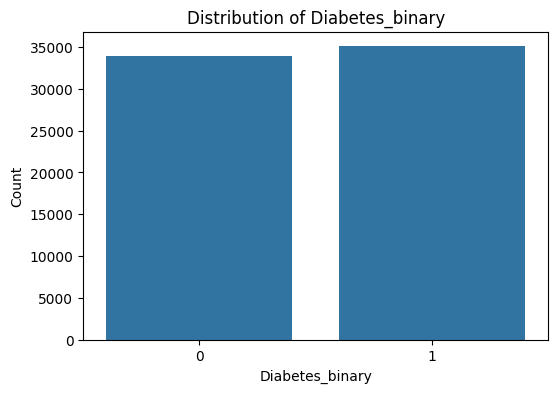

In [94]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_binary', data=scaled_data)
plt.title('Distribution of Diabetes_binary')
plt.xlabel('Diabetes_binary')
plt.ylabel('Count')
plt.show()

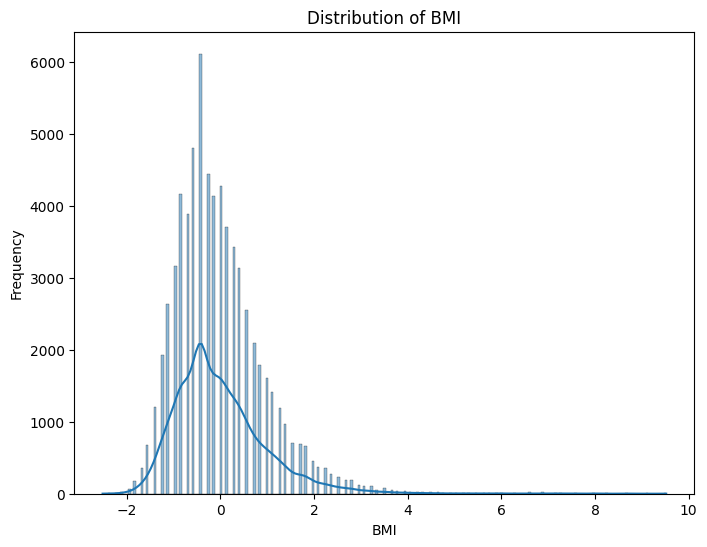

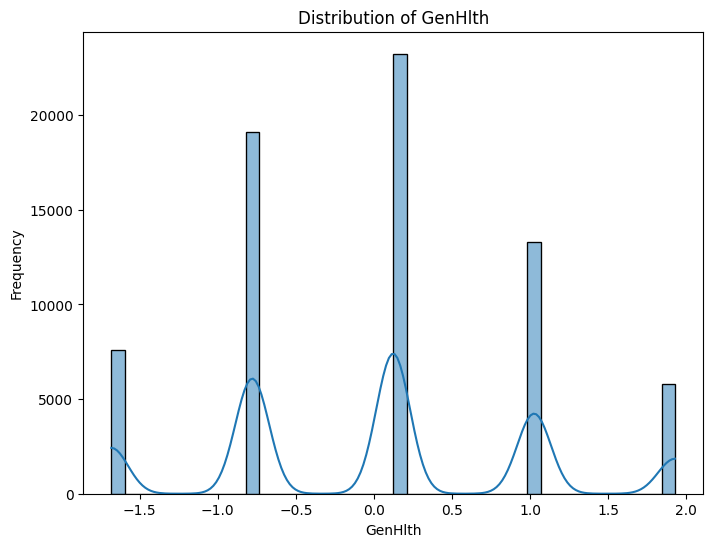

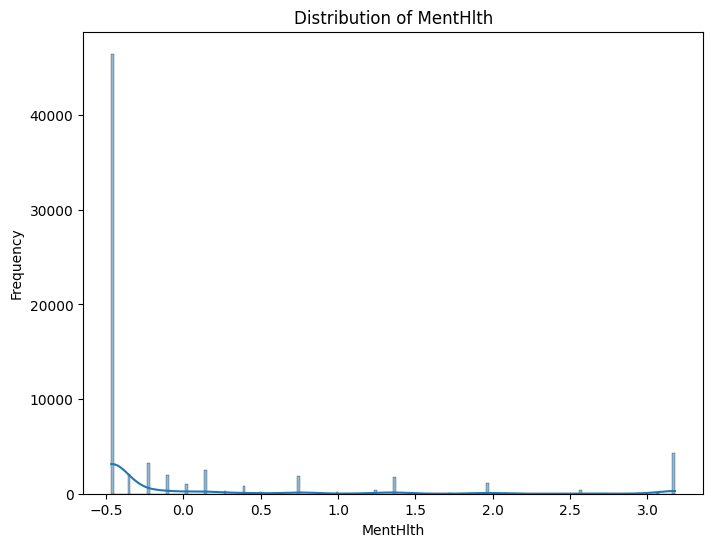

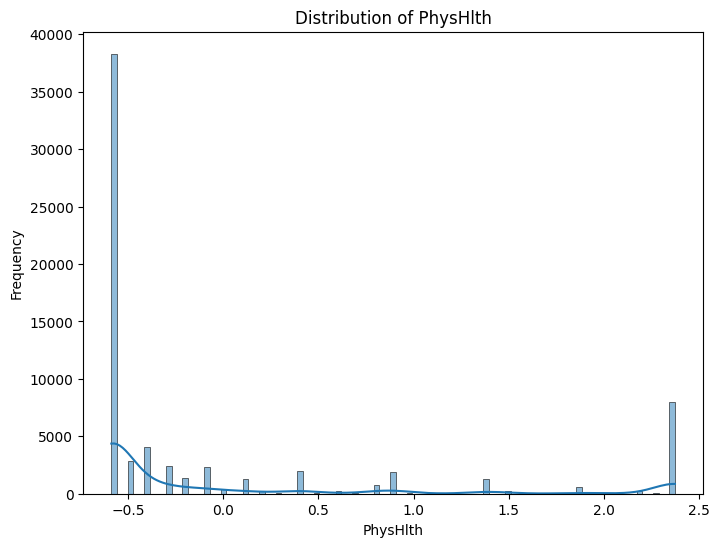

In [95]:
selected_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=scaled_data, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

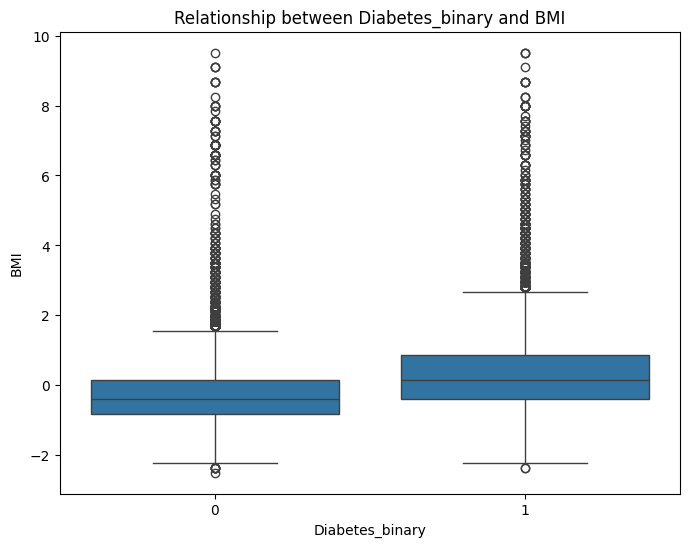

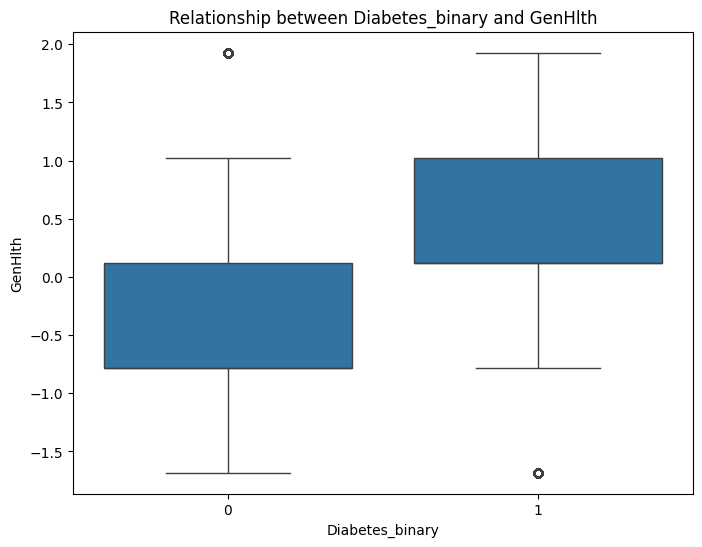

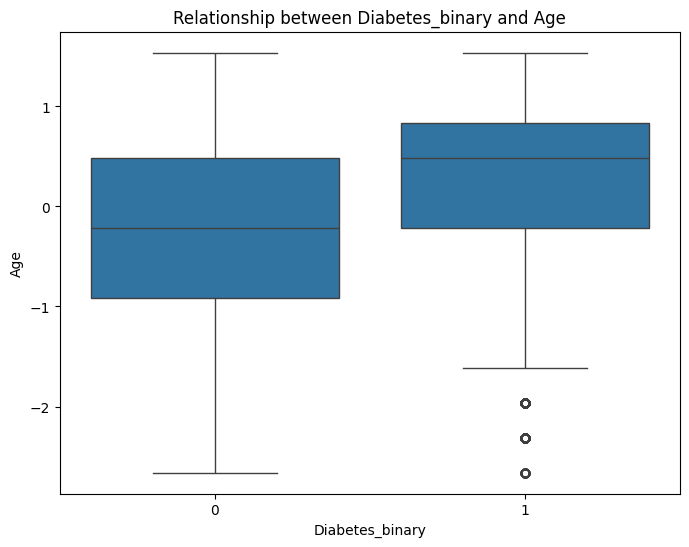

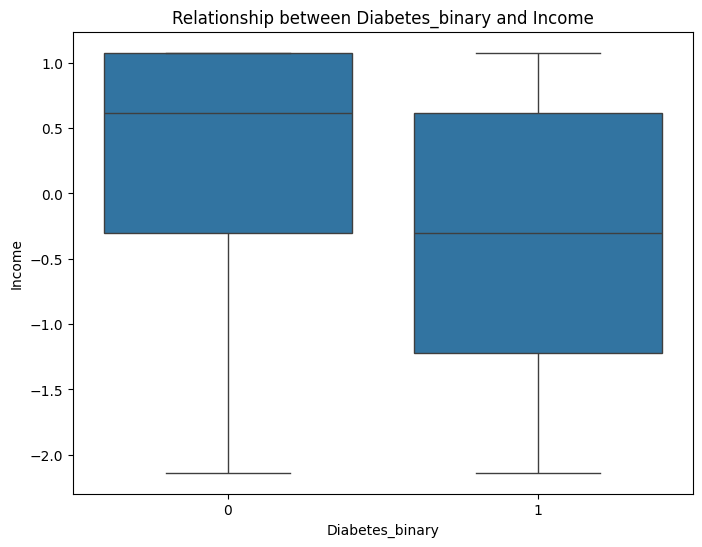

In [96]:
selected_features_for_relationship = ['BMI', 'GenHlth', 'Age', 'Income']

for feature in selected_features_for_relationship:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Diabetes_binary', y=feature, data=scaled_data)
    plt.title(f'Relationship between Diabetes_binary and {feature}')
    plt.xlabel('Diabetes_binary')
    plt.ylabel(feature)
    plt.show()

In [99]:
# IT24102218
# Feature Selection 


# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [100]:

# Check for missing values
print(scaled_data.isnull().sum())

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [101]:
# Separate features (X) and target (y)
X = scaled_data.drop(columns=["Diabetes_binary"])
y = scaled_data["Diabetes_binary"]

In [123]:
# Apply Mutual Information
feature_selection = SelectKBest(score_func = mutual_info_classif, k = 9)
feature_selection.fit(X,y)

,score_func,<function mut...00158DFCDE200>
,k,9


In [124]:
# Get scores
mutual_score = pd.Series(feature_selection.scores_, index = X.columns)
mutual_score

GenHlth                 0.074294
HighBP                  0.043383
BMI                     0.053925
Age                     0.024290
HighChol                0.015125
DiffWalk                0.087346
PhysHlth                0.028420
Income                  0.040168
HeartDiseaseorAttack    0.049342
Education               0.022220
dtype: float64

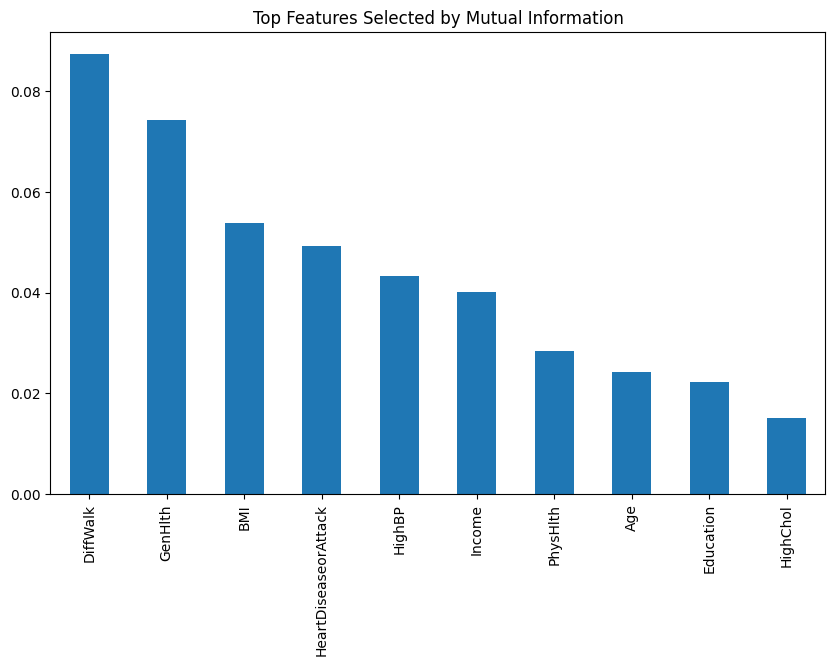

In [125]:
# Plot top features
mutual_score.sort_values(ascending = False).plot.bar(figsize = (10, 6))
plt.title("Top Features Selected by Mutual Information")
plt.show()

In [126]:
# Transform dataset
selected_columns = mutual_score.sort_values(ascending=False).head(9).index
X_selected = feature_selection.fit_transform(X, y)
X_selected = pd.DataFrame(X_selected, columns=selected_columns)

In [127]:
X_selected.shape

(69058, 9)

In [128]:

# After selection
X_selected.head()

,DiffWalk,GenHlth,BMI,HeartDiseaseorAttack,HighBP,Income,PhysHlth,Age,Education
0,0.866402,-1.064734,-0.553426,-0.421522,0.123039,2.372502,-0.590606,-1.610790,1.079537
1,0.866402,0.939202,-0.553426,-0.421522,0.123039,-0.586372,-0.590606,1.188132,1.079537
2,-1.154198,-1.064734,-0.553426,-0.421522,-1.682114,0.399919,-0.590606,1.537998,1.079537
3,0.866402,0.939202,-0.273623,-0.421522,0.123039,-0.290485,-0.590606,0.838267,1.079537
4,-1.154198,-1.064734,-0.133721,-0.421522,-0.779537,-0.586372,-0.590606,-0.211329,1.079537


In [129]:
# combine target with selected features
all_data = pd.concat([y.reset_index(drop=True), X_selected.reset_index(drop=True)], axis=1)


In [130]:
all_data.head()
all_data.tail()


,Diabetes_binary,DiffWalk,GenHlth,BMI,HeartDiseaseorAttack,HighBP,Income,PhysHlth,Age,Education
69053,1,-1.154198,0.939202,0.985494,-0.421522,1.025616,-0.586372,-0.590606,-0.911059,-2.137974
69054,1,-1.154198,0.939202,-0.133721,2.372358,-0.779537,-0.586372,1.693176,0.488402,0.160248
69055,1,0.866402,0.939202,-0.693328,2.372358,1.928193,-0.586372,1.693176,1.537998,-0.759041
69056,1,0.866402,0.939202,-1.672641,-0.421522,1.025616,-0.586372,1.693176,0.838267,-0.759041
69057,1,0.866402,0.939202,-0.693328,2.372358,-0.779537,-0.586372,-0.590606,0.138537,-1.678330


In [131]:
# IT24102321
# Dimension Reduction
from sklearn.decomposition import PCA

In [132]:
# Assuming df is your DataFrame and 'Diabetes_binary' is your target
X = all_data.drop(columns=['Diabetes_binary'])
y = all_data['Diabetes_binary']


In [135]:
pca = PCA(n_components=9)
pca_scaled_data=pca.fit_transform(X_selected)

In [136]:
# variance for each pca1,2,3..10 as ratio
pca.explained_variance_ratio_

array([0.32074875, 0.14246279, 0.11286014, 0.091384  , 0.08497467,
       0.08005725, 0.06711273, 0.05524495, 0.04515473])

In [137]:
X_scaled.shape
pca_scaled_data.shape

(69058, 9)

In [139]:
pca_df = pd.DataFrame(pca_scaled_data, columns=[f'PCA_Component_{i+1}' for i in range(9)])
print("First 5 rows of PCA Components:")
print(pca_df.head())

First 5 rows of PCA Components:
   PCA_Component_1  PCA_Component_2  PCA_Component_3  PCA_Component_4  \
0        -0.211575        -1.502806        -0.011023         0.815931   
1        -0.192367         1.950209         0.309389        -0.250666   
2        -1.741106         0.557990        -1.042231        -0.047844   
3        -0.094891         1.594358         0.561630        -0.082538   
4        -2.032065        -0.368495        -0.118345         0.402367   

   PCA_Component_5  PCA_Component_6  PCA_Component_7  PCA_Component_8  \
0         0.878732         1.194836         2.326966         0.173743   
1         0.738555         0.659141         0.331420        -0.265150   
2        -0.137850         1.614684        -0.948359        -0.725619   
3         0.799263         0.606557         0.420797        -0.258924   
4        -0.255127         0.640539        -0.399342        -0.293556   

   PCA_Component_9  
0        -1.227689  
1         0.492554  
2        -1.155611  
3     

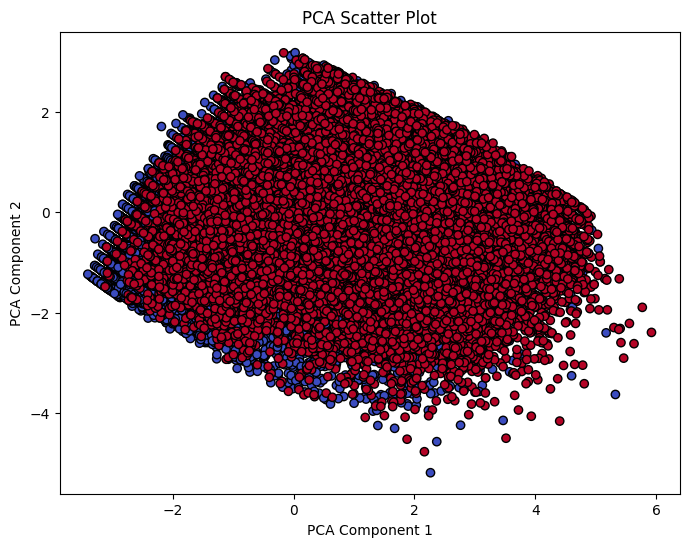

In [140]:
# scatter plot
y_for_pca = y.loc[X_selected.index]  # ensures matching rows

plt.figure(figsize=(8,6))
plt.scatter(
    pca_scaled_data[:,0], 
    pca_scaled_data[:,1], 
    c=y_for_pca,           # matching length
    cmap='coolwarm', 
    edgecolor='k'
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Scatter Plot')
plt.show()


In [141]:
n_components = pca_scaled_data.shape[1]
pca_df = pd.DataFrame(
    pca_scaled_data, 
    columns=[f'PCA_Component_{i+1}' for i in range(n_components)]
)

In [142]:
# y_for_pca should be aligned with the PCA data
final_df = pd.concat([y_for_pca.reset_index(drop=True), pca_df], axis=1)


In [143]:
# Column names
print(final_df.columns)

# Shape (rows × columns)
print(final_df.shape)


Index(['Diabetes_binary', 'PCA_Component_1', 'PCA_Component_2',
       'PCA_Component_3', 'PCA_Component_4', 'PCA_Component_5',
       'PCA_Component_6', 'PCA_Component_7', 'PCA_Component_8',
       'PCA_Component_9'],
      dtype='object')
(69058, 10)


In [144]:
# First 5 rows
final_df.head()



,Diabetes_binary,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4,PCA_Component_5,PCA_Component_6,PCA_Component_7,PCA_Component_8,PCA_Component_9
0,0,-0.211575,-1.502806,-0.011023,0.815931,0.878732,1.194836,2.326966,0.173743,-1.227689
1,0,-0.192367,1.950209,0.309389,-0.250666,0.738555,0.659141,0.331420,-0.265150,0.492554
2,0,-1.741106,0.557990,-1.042231,-0.047844,-0.137850,1.614684,-0.948359,-0.725619,-1.155611
3,0,-0.094891,1.594358,0.561630,-0.082538,0.799263,0.606557,0.420797,-0.258924,0.278677
4,0,-2.032065,-0.368495,-0.118345,0.402367,-0.255127,0.640539,-0.399342,-0.293556,0.098827


In [145]:
# Last 5 rows
final_df.tail()

,Diabetes_binary,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4,PCA_Component_5,PCA_Component_6,PCA_Component_7,PCA_Component_8,PCA_Component_9
69053,1,0.418226,-1.177960,0.656432,-0.898877,0.143866,-2.424779,-0.585474,-1.044092,0.611638
69054,1,0.674658,0.809268,-1.060967,1.768305,-0.382917,-0.695747,-2.174247,1.103237,0.070775
69055,1,2.992330,1.543602,-1.437563,0.659125,-0.635743,-0.500793,-0.342993,0.476576,1.665597
69056,1,1.421588,0.889701,-1.135511,-1.326997,0.807548,-0.005378,-0.027736,1.280458,1.412187
69057,1,0.757476,1.654177,-0.950323,0.431592,-1.051424,-2.306948,0.362182,0.515752,-0.808525


In [146]:
final_df.to_csv("diabetes_final_dataset.csv", index=False)
